In [1]:
# Import Data Manipulation library
import numpy as np
import pandas as pd

# Import Data Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#Import Filter Warnings library
import warnings
warnings.filterwarnings('ignore')

#Import Logging Libraries
import logging
logging.basicConfig(level=logging.INFO, filename= 'model.log', format='%(asctime)s - %(levelname)s - %(message)s', filemode='w')

#importing Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
##IMporting Dataset using Pandas function

df = pd.read_csv('bank.csv', sep = ';')

df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3329,34,management,divorced,tertiary,no,13204,yes,yes,cellular,20,nov,197,2,-1,0,unknown,no
4014,41,admin.,married,secondary,no,21515,yes,no,unknown,5,jun,87,1,-1,0,unknown,no
1426,38,entrepreneur,married,secondary,no,157,no,yes,cellular,15,may,57,11,366,1,other,no
2940,61,technician,married,secondary,no,1191,no,no,cellular,21,may,214,4,-1,0,unknown,yes
3042,49,housemaid,married,tertiary,no,443,no,no,cellular,8,aug,27,6,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,58,management,married,tertiary,no,2729,no,no,unknown,18,jun,188,1,-1,0,unknown,no
3057,29,technician,married,tertiary,no,43,yes,no,unknown,20,may,68,2,-1,0,unknown,no
1496,44,unemployed,single,secondary,no,3945,no,no,cellular,28,jan,255,1,-1,0,unknown,no
40,38,management,single,tertiary,no,11971,yes,no,unknown,17,nov,609,2,101,3,failure,no


In [3]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB



Evaluate Descriptive Statistics : EDA

In [4]:


#Step 1: Segregate Numerical and Categorical Columns 

categorical_columns = df.select_dtypes(include=['object'])
numerical_columns = df.select_dtypes(exclude=['object'])


In [5]:
#Step 2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats = []


for i in numerical_columns.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Mode':df[i].mode()[0],  # mode() returns a Series, take the first element
        'Min':df[i].min(),
        'Max':df[i].max(),
        'Standard Deviation':df[i].std(),
        'Variance':df[i].var(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurtosis(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Mode,Min,Max,Standard Deviation,Variance,Skewness,Kurtosis,Q1,Q3,IQR
0,age,41.170095,39.0,34,19,87,10.576211,1.118562e+02,0.699501,0.348775,33.0,49.0,16.0
1,balance,1422.657819,444.0,0,-3313,71188,3009.638142,9.057922e+06,6.596431,88.390332,69.0,1480.0,1411.0
2,day,15.915284,16.0,20,1,31,8.247667,6.802402e+01,0.094627,-1.039531,9.0,21.0,12.0
3,duration,263.961292,185.0,123,4,3025,259.856633,6.752547e+04,2.772420,12.530050,104.0,329.0,225.0
4,campaign,2.793630,2.0,1,1,50,3.109807,9.670897e+00,4.743914,37.168920,1.0,3.0,2.0
5,pdays,39.766645,-1.0,-1,-1,871,100.121124,1.002424e+04,2.717071,7.957128,-1.0,-1.0,0.0
6,previous,0.542579,0.0,0,0,25,1.693562,2.868153e+00,5.875259,51.995212,0.0,0.0,0.0


NOTE :

In [6]:

'''
**The logistic function is based on the sigmoid function

 **Whenever you are evaluate the descriptive statistics make 
  sure that IQR of any column cannot be zero, that signifies 
  that such column will not contribute in the machine learning performance.
  Infact that will lower the performance of the model.
  So, we need to drop such columns. 
  
  '''

'\n**The logistic function is based on the sigmoid function\n\n **Whenever you are evaluate the descriptive statistics make \n  sure that IQR of any column cannot be zero, that signifies \n  that such column will not contribute in the machine learning performance.\n  Infact that will lower the performance of the model.\n  So, we need to drop such columns. \n  \n  '

In [7]:
#Problem defination


'''
The Datset consist of 4521 rows and 17 columns.
This dataset belongs to portugal bank where our aim is to classify whether the customer will subscribe 
the bank term deposit or not

Type of machine learning model : Binary Classification

Above dataset is a type of Multivariate Analysis

X: Independent Column
Y: Target Column / Dependent Column

Here,  y act as  Target Column / Dependent Column.

'''

'\nThe Datset consist of 4521 rows and 17 columns.\nThis dataset belongs to portugal bank where our aim is to classify whether the customer will subscribe \nthe bank term deposit or not\n\nType of machine learning model : Binary Classification\n\nAbove dataset is a type of Multivariate Analysis\n\nX: Independent Column\nY: Target Column / Dependent Column\n\nHere,  y act as  Target Column / Dependent Column.\n\n'

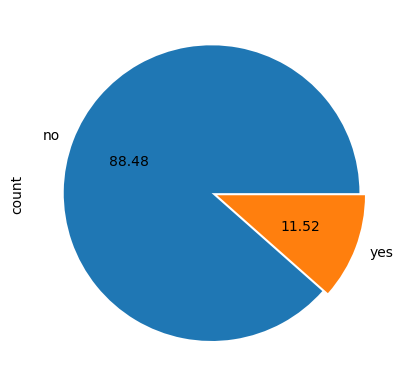

In [8]:

#Ploting distribution chart 
df['y'].value_counts().plot(kind='pie', autopct = '%1.2f', explode = [0.02,0.02])
plt.show()

In [9]:
#Checking the Distribution of people who subscribed the term deopsite
df['y'].value_counts()

'''
Based on distribution of the target column, we found out that the data is imbalance.
i.e. No = 4000
     Yes = 521

'''

'\nBased on distribution of the target column, we found out that the data is imbalance.\ni.e. No = 4000\n     Yes = 521\n\n'

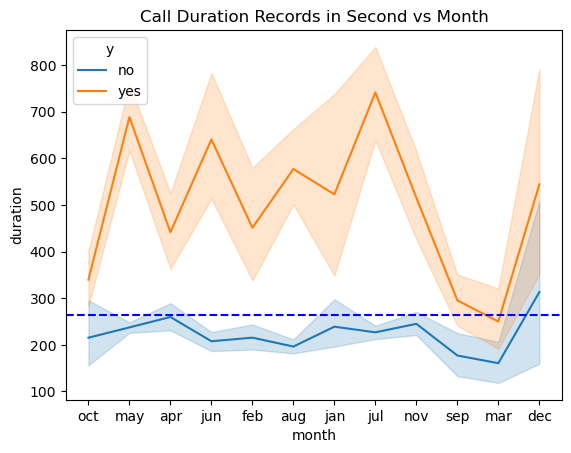

In [10]:
#Month-wise call Duration trend analysis

sns.lineplot( x=df['month'], y=df['duration'], hue = df['y'])
plt.axhline(df['duration'].mean(), linestyle = '--', c = 'b')

plt.title('Call Duration Records in Second vs Month')
plt.show()

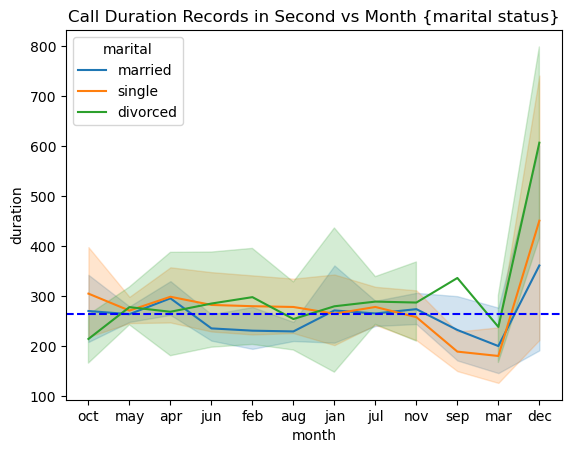

In [11]:
sns.lineplot( x=df['month'], y=df['duration'], hue = df['marital'])
plt.axhline(df['duration'].mean(), linestyle = '--', c = 'b')

plt.title('Call Duration Records in Second vs Month {marital status}')
plt.show()

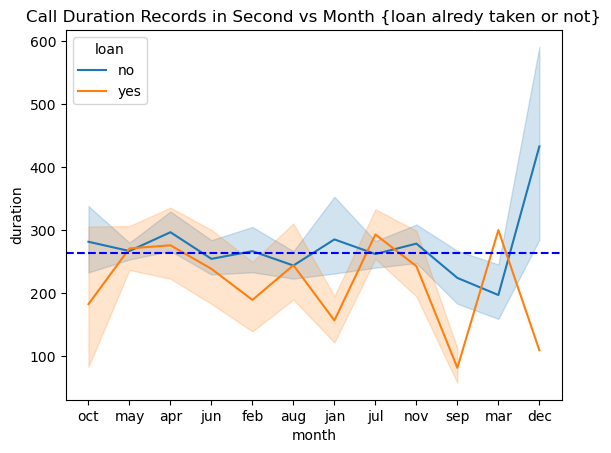

In [12]:
sns.lineplot( x=df['month'], y=df['duration'], hue = df['loan'])
plt.axhline(df['duration'].mean(), linestyle = '--', c = 'b')

plt.title('Call Duration Records in Second vs Month {loan alredy taken or not}')
plt.show()

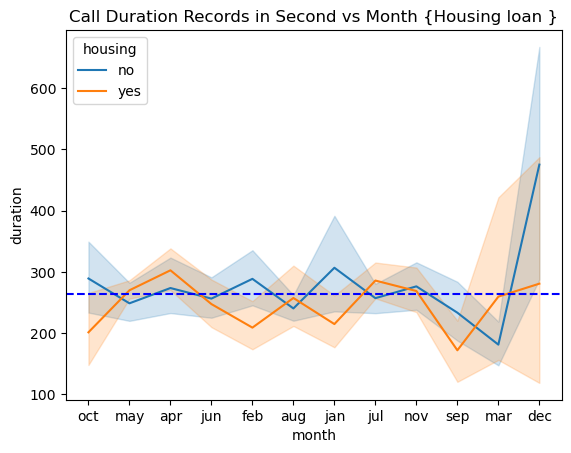

In [13]:
sns.lineplot( x=df['month'], y=df['duration'], hue = df['housing'])
plt.axhline(df['duration'].mean(), linestyle = '--', c = 'b')

plt.title('Call Duration Records in Second vs Month {Housing loan }')
plt.show()

<Axes: ylabel='count'>

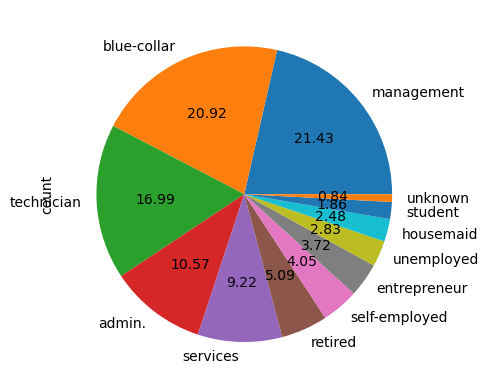

In [14]:
df['job'].value_counts().plot(kind='pie', autopct ='%1.2f') # Subscription taken by based on jobs or profile

In [15]:
Mangement = df[df['job'] == 'management']
Blue_collor = df[df['job'] == 'blue-collar']
Admin = df[df['job'] == 'admin.']
technician = df[df['job'] == 'technician']

<Axes: ylabel='count'>

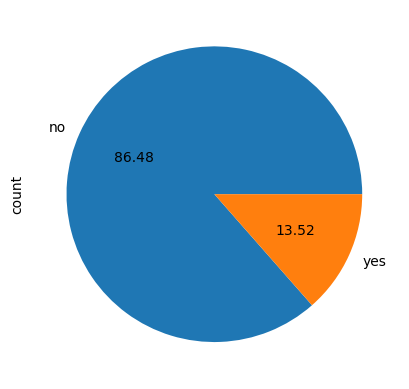

In [16]:
Mangement['y'].value_counts().plot(kind='pie', autopct ='%1.2f')

<Axes: ylabel='balance'>

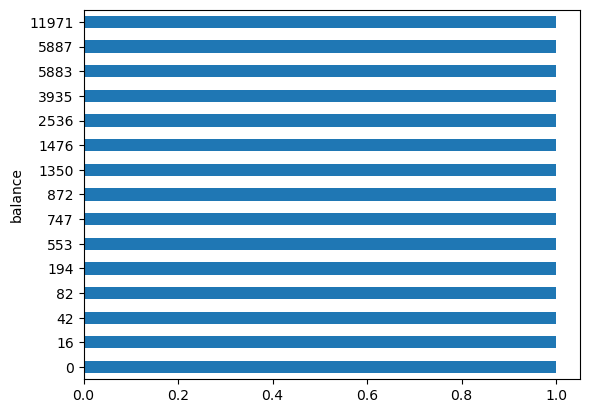

In [17]:
Mangement['balance'][:15].sort_values(ascending = True).value_counts().plot(kind='barh')

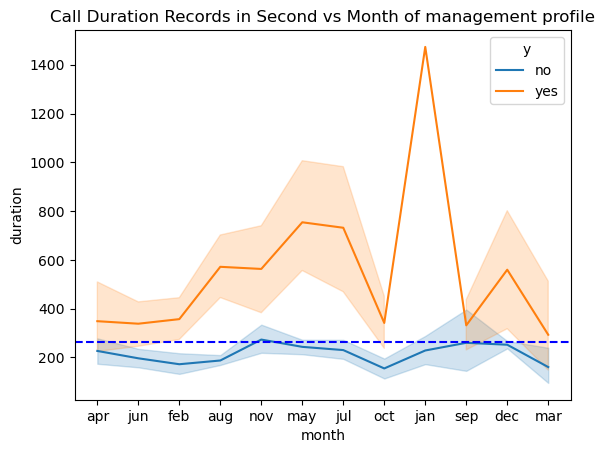

In [18]:
sns.lineplot( x=Mangement['month'], y=Mangement['duration'], hue = Mangement['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.title('Call Duration Records in Second vs Month of management profile')
plt.show()

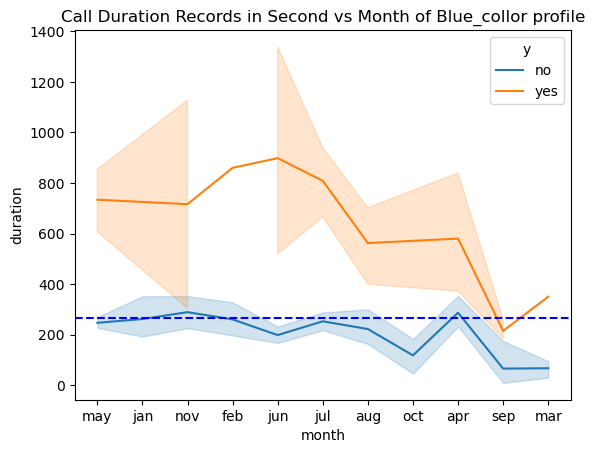

In [19]:
sns.lineplot( x=Blue_collor['month'], y=Blue_collor['duration'], hue = Blue_collor['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.title('Call Duration Records in Second vs Month of Blue_collor profile')
plt.show()

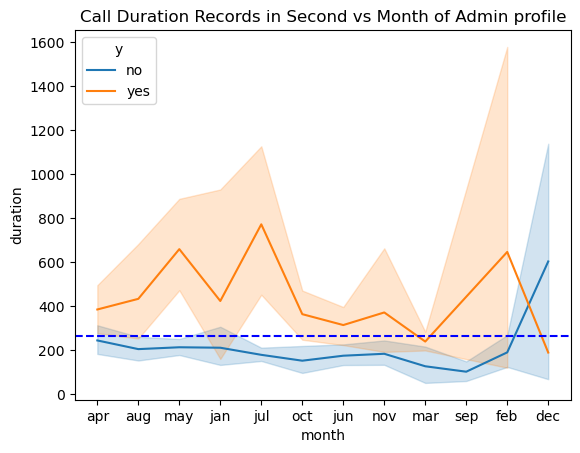

In [20]:
sns.lineplot( x=Admin['month'], y=Admin['duration'], hue = Admin['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.title('Call Duration Records in Second vs Month of Admin profile')
plt.show()

In [21]:
#Data Insights:

'''
1) 88.48% people are not subscribing bank term deposite.
2) The Average Call Duration Recorded 264 Seconds.
   This can be one of the cause for the people who have
   not subscribe the bank term deposite.
3) If the call duaration is more than 300 seconds the chances are more that the person will subscribe 
    {we have come to this point from the graph} 
4) The Target Audience is the divorced people 
5) The people who have taken a loan has excluded from the bank term deposite subscription as call records shows the yes part have very low call duration
6) The people who have already taken houshing loan has not been entertained

'''

'\n1) 88.48% people are not subscribing bank term deposite.\n2) The Average Call Duration Recorded 264 Seconds.\n   This can be one of the cause for the people who have\n   not subscribe the bank term deposite.\n3) If the call duaration is more than 300 seconds the chances are more that the person will subscribe \n    {we have come to this point from the graph} \n4) The Target Audience is the divorced people \n5) The people who have taken a loan has excluded from the bank term deposite subscription as call records shows the yes part have very low call duration\n6) The people who have already taken houshing loan has not been entertained\n\n'

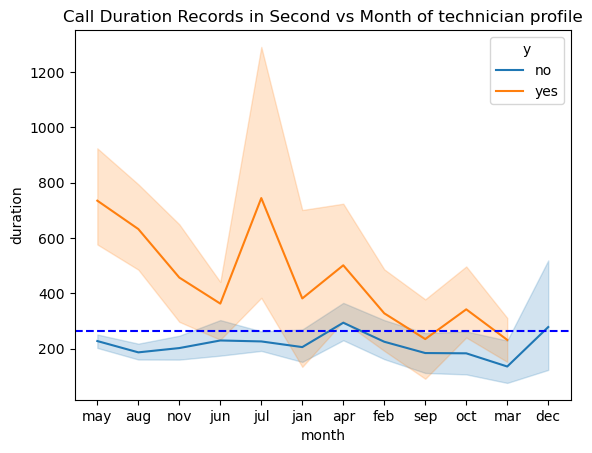

In [22]:
sns.lineplot( x=technician['month'], y=technician['duration'], hue = technician['y'])
plt.axhline(264,linestyle = '--', c = 'b')
plt.title('Call Duration Records in Second vs Month of technician profile')
plt.show()

In [23]:
Admin

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11,43,admin.,married,secondary,no,264,yes,no,cellular,17,apr,113,2,-1,0,unknown,no
17,37,admin.,single,tertiary,no,2317,yes,no,cellular,20,apr,114,1,152,2,failure,no
29,53,admin.,married,secondary,no,105,no,yes,cellular,21,aug,74,2,-1,0,unknown,no
35,42,admin.,divorced,secondary,no,1811,yes,no,unknown,14,may,150,1,-1,0,unknown,no
49,61,admin.,married,unknown,no,4629,yes,no,cellular,27,jan,181,1,92,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,46,admin.,married,secondary,no,466,yes,no,cellular,29,jan,169,1,-1,0,unknown,no
4490,58,admin.,married,secondary,no,3496,yes,no,unknown,2,jun,111,4,-1,0,unknown,no
4500,38,admin.,married,secondary,no,4196,yes,no,cellular,12,may,193,2,-1,0,unknown,no
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


In [24]:
numerical_columns

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [25]:
'''
1. Pdays and previous these two column shows IQR = 0, hence we need to drop these two columns from the dataset


'''

#Create a copy of the dataset

data = df.copy()
data.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3892,35,admin.,divorced,tertiary,no,1555,yes,no,unknown,9,may,26,2,-1,0,unknown,no
212,38,technician,married,tertiary,no,432,yes,no,cellular,15,may,10,2,373,1,other,no
465,59,housemaid,married,secondary,no,0,no,no,telephone,3,feb,722,1,99,4,failure,no
3157,75,blue-collar,married,secondary,no,6053,no,no,cellular,11,feb,865,2,190,1,failure,no
502,31,management,married,tertiary,no,13,no,no,cellular,28,aug,110,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
361,42,blue-collar,married,primary,no,0,yes,yes,cellular,7,may,209,2,-1,0,unknown,no
3413,33,self-employed,single,tertiary,no,61,no,no,cellular,19,aug,836,3,-1,0,unknown,yes
3148,36,admin.,single,secondary,no,1927,yes,no,cellular,18,nov,288,1,137,1,other,no


In [26]:
#Encoding using get_dummies method
'''

Observation:
1. The number of columns are increased , which impact badly w.r.t model Builduing
'''

data = pd.get_dummies(data, drop_first = True, dtype = 'int')

In [27]:
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [28]:
#ENcodinf Technique : Label Encoder 

'''
1.Independent Columns can be encoded directly using labelEncoder
2. Target Column must be decoded seprately either by using replace function or map function

'''
preprocess_data = df.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Trandform all categorical columns : Independent Columns
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])


#Transform Target Column to NUmerical
df['y'] = df['y'].replace({'yes':1, 'no':0})

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [30]:
#Concept of Data Leackage
'''
step 1 : Split the dataset into X and y
         X : Independent Columns
         y : Target Columns

Step 2 : Split the data into train and test 
         train data : seen data
         test data : Unseen data

Step 3 : Try Balance the target column in case of classification problem
        Imbalance Technique : 1. Oversampling 2. Undersampling

Step 4 : Use Scaling Technique:
        1. MinMaxScaler
        2. RobustScaler
        3. StandardScaler

Step 5 : Model Builduing

'''



'\nstep 1 : Split the dataset into X and y\n         X : Independent Columns\n         y : Target Columns\n\nStep 2 : Split the data into train and test \n         train data : seen data\n         test data : Unseen data\n\nStep 3 : Try Balance the target column in case of classification problem\n        Imbalance Technique : 1. Oversampling 2. Undersampling\n\nStep 4 : Use Scaling Technique:\n        1. MinMaxScaler\n        2. RobustScaler\n        3. StandardScaler\n\nStep 5 : Model Builduing\n\n'

In [31]:
# Step 1 : Split the dataset into X and y
X = df.drop(columns =['pdays', 'previous' , 'y'],axis = 1)
y = df['y']

In [32]:
#Step 2 : Split the dataset into train and test

X_train , X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [35]:
#Step 3: Balancing the Target Column
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import ClusterCentroids
sm = SMOTE(random_state= 42)
# sm = ClusterCentroids(random_state= 42)
X_train , y_train = sm.fit_resample(X_train,y_train)

y_train.value_counts()


y
0    369
1    369
Name: count, dtype: int64

In [39]:
#Step 4 : Scaling technique

sc = MinMaxScaler() #Beacause the data is non-normal distribution

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)